<a href="https://colab.research.google.com/github/andersonmgomes/wgesad22_transformers/blob/main/GESAD2022_Transformers_Caderno06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

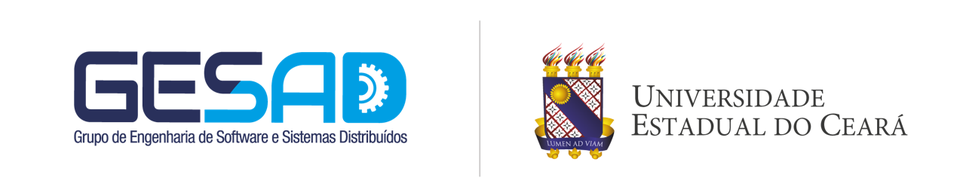

---
#<center><b>WGESAD22</b></center>
##<center><i>Workshop do Grupo de Engenharia de Software Adaptativo e Distribuído</i></center>
---

### <center>Prof.: [Paulo Henrique Maia](https://gesad.github.io/team/paulo-henrique/)</center>
### <center>Aluno: [Anderson Martins Gomes](https://www.linkedin.com/in/amartinsg/)</center>

---
##### <center>Fortaleza, agosto de 2022.</center>
---

In [ ]:
#instalando a biblioteca transformers
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Caderno 6: Automatic Speech Recognition (ASR), Image Classification, Object Detection.

## 6.1: Automatic Speech Recognition (ASR)

In [ ]:
!pip install datasets
#vide: https://huggingface.co/docs/transformers/main/en/quicktour#pipeline
import torch
from transformers import pipeline
from datasets import load_dataset, Audio

#vide: https://huggingface.co/facebook/wav2vec2-base-960h
#instanciando uma pipeline para ASR
speech_recognizer = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-base-960h")

#vide: https://huggingface.co/datasets/PolyAI/minds14/viewer/en-US/train
#lendo um dataset de examplos de audio
dataset = load_dataset("PolyAI/minds14", name="en-US", split="train")
dataset = dataset.cast_column("audio", Audio(sampling_rate=speech_recognizer.feature_extractor.sampling_rate))

#fazendo a transcrição automática da amostra de áudio
result = speech_recognizer(dataset[:4]["audio"])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#imprimindo o resultado da transcrição
result_list = [d["text"] for d in result]
result_list

['I WOULD LIKE TO SET UP A JOINT ACCOUNT WITH MY PARTNER HOW DO I PROCEED WITH DOING THAT',
 "FODING HOW I'D SET UP A JOIN TO HET WITH MY WIFE AND WHERE THE AP MIGHT BE",
 "I I'D LIKE TOY SET UP A JOINT ACCOUNT WITH MY PARTNER I'M NOT SEEING THE OPTION TO DO IT ON THE AP SO I CALLED IN TO GET SOME HELP CAN I JUST DO IT OVER THE PHONE WITH YOU AND GIVE YOU THE INFORMATION OR SHOULD I DO IT IN THE AP AND I'M MISSING SOMETHING UQUETTE HAD PREFERRED TO JUST DO IT OVER THE PHONE OF POSSIBLE THINGS",
 'HOW DO I THURN A JOIN A COUNT']

## 6.2: Image Classification

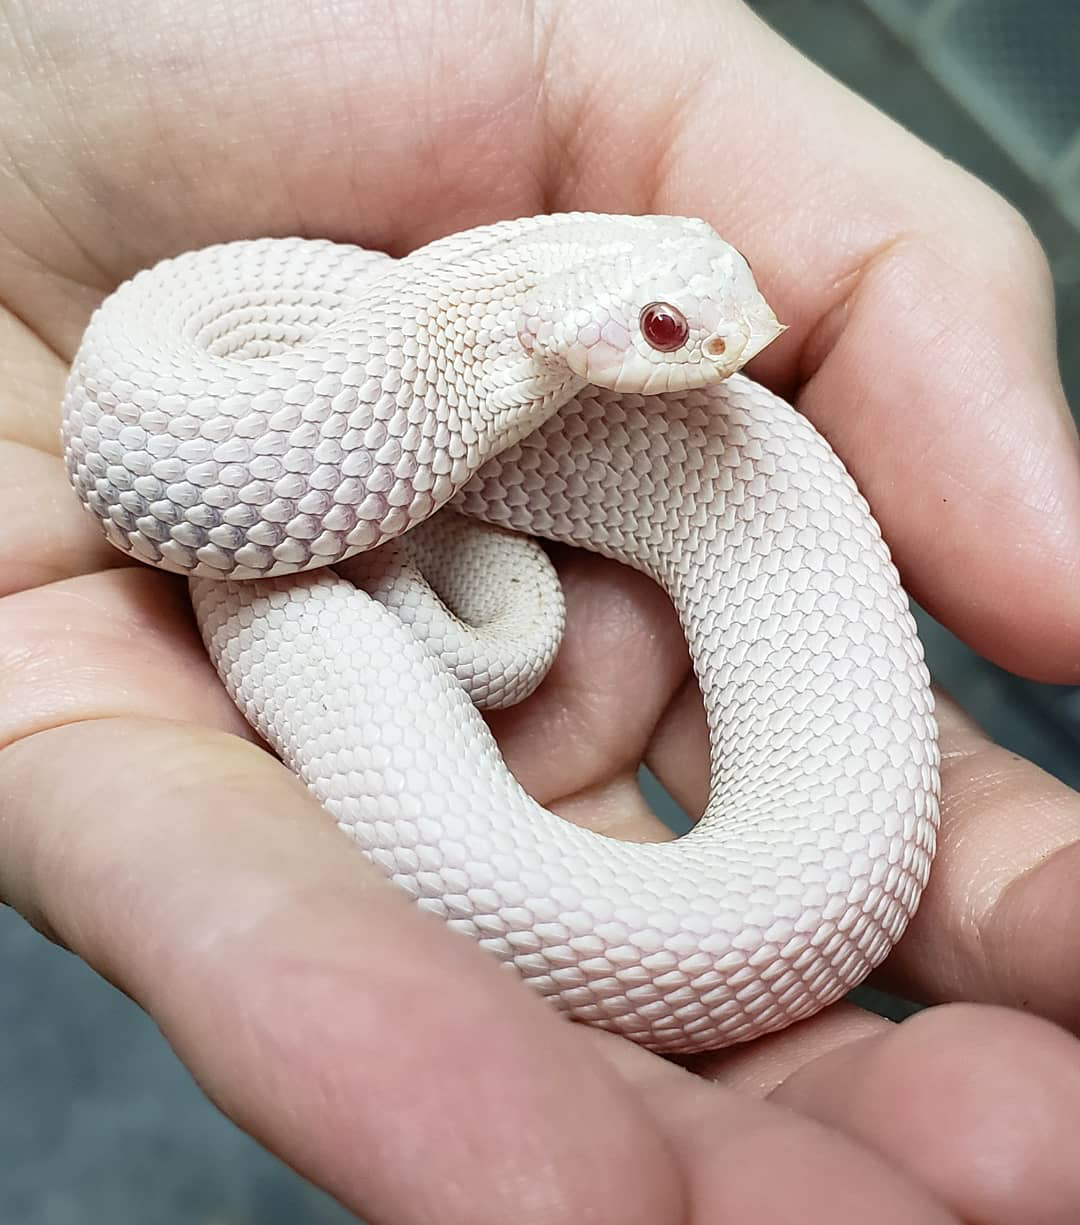

In [ ]:
#vide: https://huggingface.co/google/vit-base-patch16-224

from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

#url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
url = 'http://images.cocodataset.org/test-stuff2017/000000028352.jpg'
#url = 'http://images.cocodataset.org/test-stuff2017/000000027833.jpg'
#exemplos aleatórios da internet:
url = 'https://i0.wp.com/www.arrobanerd.com.br/wp-content/uploads/2022/05/dog-a-aventura-de-uma-vida-cri%CC%81tica.jpg?w=1200&ssl=1'
url = 'https://www.opovo.com.br/_midias/jpg/2022/04/01/818x460/1_castanhao_007-18452124.jpg'
#url = 'https://www.opovo.com.br/_midias/jpg/2022/08/04/818x460/1_1659622739653881-19349735.jpg'
url = 'https://preview.redd.it/ko7dtqng8vw21.jpg?auto=webp&s=f8c635269da12684866b268c99917c7c422ba2df'

image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: thunder snake, worm snake, Carphophis amoenus


##6.3: Object Detection

In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


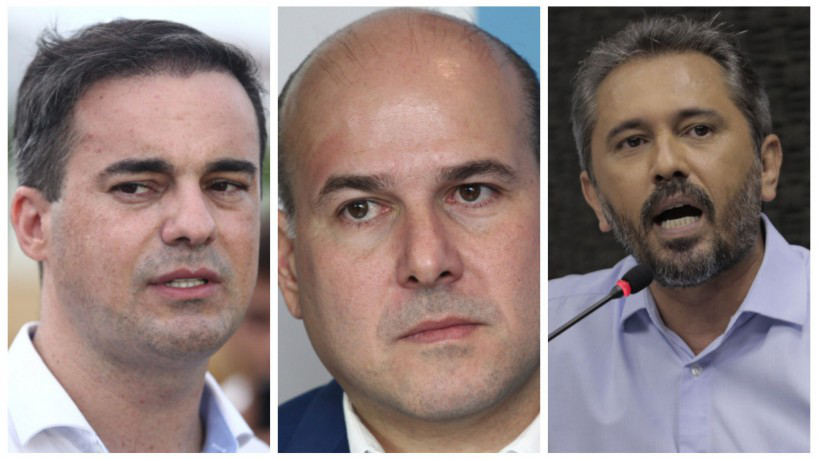

In [ ]:
#vide: https://huggingface.co/facebook/detr-resnet-50

from transformers import DetrFeatureExtractor
from transformers import DetrForObjectDetection
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
#url = 'http://images.cocodataset.org/test-stuff2017/000000028352.jpg'
#url = 'http://images.cocodataset.org/test-stuff2017/000000027833.jpg'
#exemplos aleatórios da internet:
#url = 'https://i0.wp.com/www.arrobanerd.com.br/wp-content/uploads/2022/05/dog-a-aventura-de-uma-vida-cri%CC%81tica.jpg?w=1200&ssl=1'
#url = 'https://www.opovo.com.br/_midias/jpg/2022/04/01/818x460/1_castanhao_007-18452124.jpg'
url = 'https://www.opovo.com.br/_midias/jpg/2022/08/04/818x460/1_1659622739653881-19349735.jpg'
#url = 'https://preview.redd.it/ko7dtqng8vw21.jpg?auto=webp&s=f8c635269da12684866b268c99917c7c422ba2df'
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
feature_extractor = DetrFeatureExtractor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
target_sizes = torch.tensor([image.size[::-1]])
results = feature_extractor.post_process(outputs, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    # let's only keep detections with score > 0.9
    if score > 0.6:
        print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
        )


Detected person with confidence 0.751 at location [207.79, 287.32, 275.03, 441.35]
Detected tie with confidence 0.728 at location [26.99, 426.35, 109.87, 457.98]
Detected person with confidence 0.999 at location [4.53, 16.52, 267.25, 453.08]
Detected person with confidence 0.997 at location [270.79, 8.18, 546.6, 452.28]
Detected person with confidence 0.999 at location [545.21, 15.09, 810.63, 451.34]
